Credit to Lynnette Ng for code (just modified by Michael Miller Yoder)

In [33]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


# Load PCA data
grouping = 'identity'
clf = 'bert'
df = pd.read_csv(f'../output/cross_dataset/combined_{grouping}_{clf}_kennedy2020+sbic+hatexplain+civilcomments_pca.csv')
df.train_dataset = df.train_dataset.str.replace(' people', '')
df.train_dataset = df.train_dataset.str.capitalize()
df.train_dataset = df.train_dataset.str.replace('Muslims and arabic/middle eastern', 'Muslims, Arabs').replace('Lgbtq+', 'LGBTQ+')
df = df.drop(8) # people of color
df

df['group'] = df.train_dataset.map(lambda x: 'dominant' if x in ['Men', 'White', 'Christians'] else 'marginalized')
df

,train_dataset,0,1,group
0,Asian,-0.230834,0.105020,marginalized
1,Black,-0.453314,-0.133167,marginalized
2,Christians,0.259553,0.114185,dominant
3,Jews,0.404768,0.491255,marginalized
4,Latinx,-0.284938,0.148737,marginalized
5,LGBTQ+,0.555467,-0.281165,marginalized
6,Men,0.122373,-0.306245,dominant
7,"Muslims, Arabs",0.086032,0.256544,marginalized
9,White,-0.204382,0.053401,dominant
10,Women,0.294347,-0.339122,marginalized


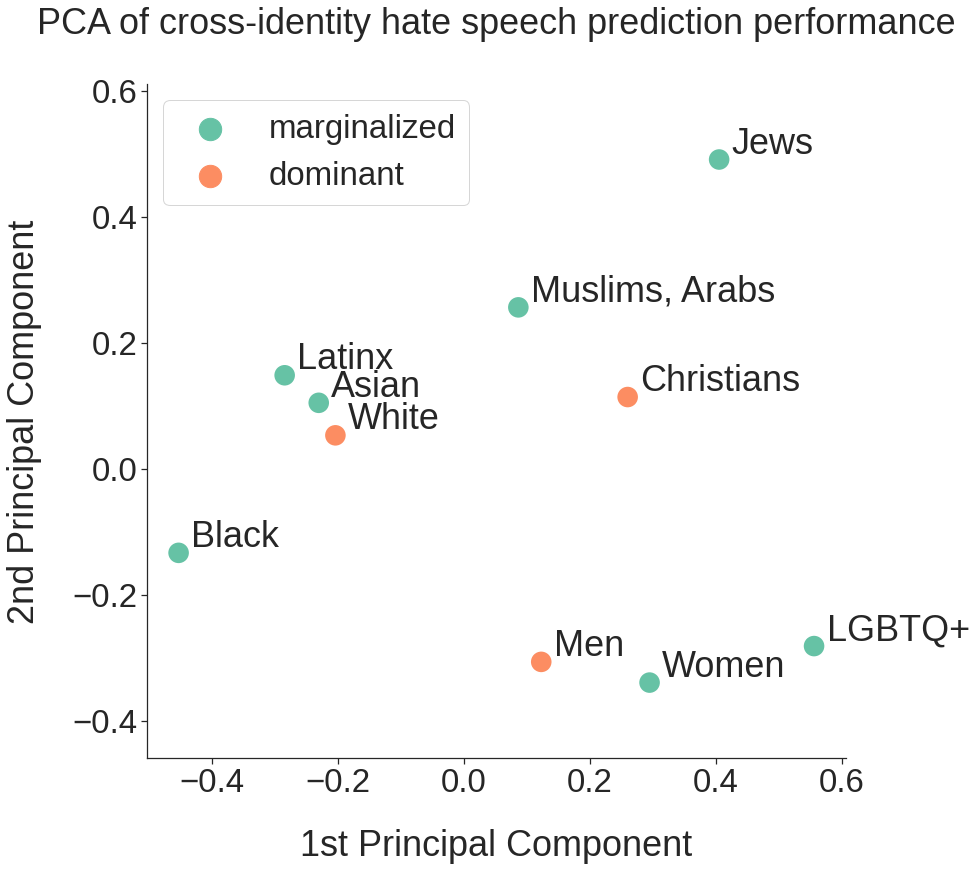

In [62]:
sns.set_theme(style='white', font=['Liberation Sans'], font_scale=3, palette="Set2")

plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['axes.titlepad'] = 50 
plt.rcParams['axes.labelpad'] = 30 

def plotlabel(xvar, yvar, label):
    # ax.text(xvar+0.002, yvar, label)
    ax.text(xvar+0.02, yvar+0.01, label)
plt.figure(figsize=(15,15))
plt.axis('equal')
plt.title('PCA of cross-identity hate speech prediction performance')
plt.tight_layout(pad=4)
ax = sns.scatterplot(data=df, x="0", y="1", hue="group", s=500)

df.apply(lambda x: plotlabel(x['0'],  x['1'], x['train_dataset']), axis=1)

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([500])

# plt.savefig(r'C:\Users\lynne\Documents\Michael\hate speech\pythonplots\identity_pca.pdf', dpi=300)
plt.savefig('../output/identity_pca.pdf', dpi=300)
plt.savefig('../output/identity_pca.png', dpi=300)

In [41]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [8]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [1]:
cols = ['Dominant', 'Marginalized']
rows = ['Dominant', 'Marginalized']
df_power_generalization = pd.DataFrame([[62.4,51.0], [61.7,74.6]], columns=cols, index=rows)

NameError: name 'pd' is not defined

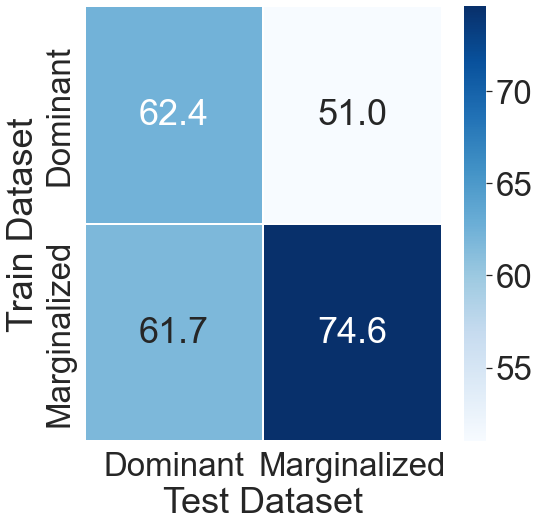

In [76]:
plt.figure(figsize=(8,8))
p_2 = sns.heatmap(df_power_generalization, cmap='Blues', linewidths = 0.20, annot = True, fmt='.1f')
p_2.set_xticklabels(p_2.get_xticklabels(), rotation=0)
p_2.set_ylabel('Train Dataset')
p_2.set_xlabel('Test Dataset')
# plt.savefig(r'C:\Users\lynne\Documents\Michael\hate speech\pythonplots\power_generalization.pdf', dpi=300, bbox_inches="tight")

In [80]:
cols_cat = ['Religion', 'Race/Ethnicity', 'Gender/Sexuality']
rows_cat = ['Religion', 'Race/Ethnicity', 'Gender/Sexuality']
df_category_generalization = pd.DataFrame([[75.6,70.7,36.0],
                                       [48.1, 77.7, 26.0],
                                       [49.1,49.1,71.4]],
                                       columns=cols_cat, index=rows_cat)

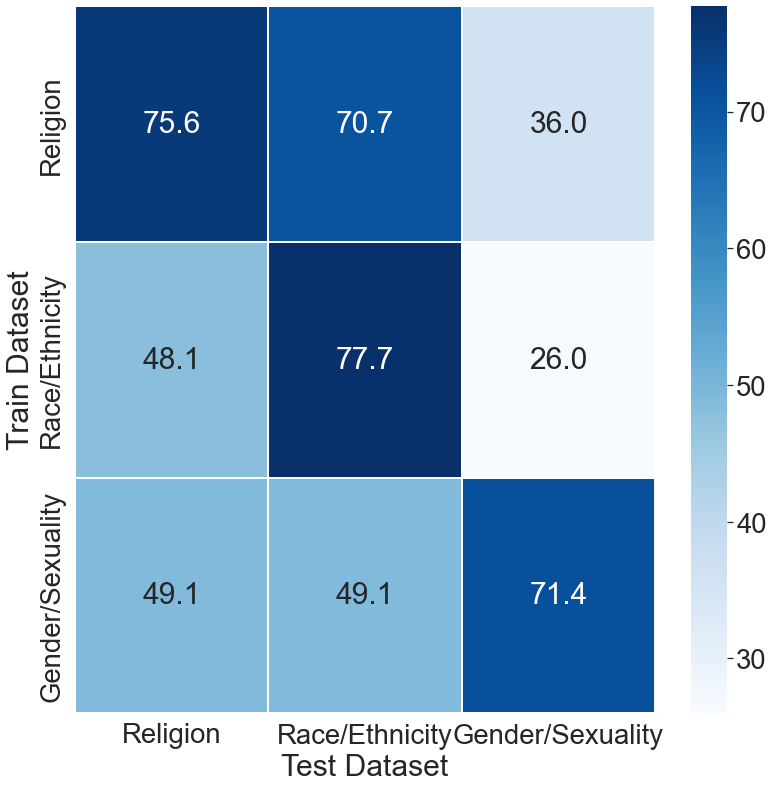

In [86]:
sns.set_theme(style='white', font_scale=2.5, palette="Set2")
plt.figure(figsize=(13,13))
p_3 = sns.heatmap(df_category_generalization, cmap='Blues', linewidths = 0.20, annot = True, fmt='.1f')
p_3.set_xticklabels(p_3.get_xticklabels(), rotation=0)
p_3.set_yticklabels(p_3.get_yticklabels(), rotation=90)
p_3.set_ylabel('Train Dataset')
p_3.set_xlabel('Test Dataset')
plt.savefig(r'C:\Users\lynne\Documents\Michael\hate speech\pythonplots\category_generalization.pdf', dpi=300, bbox_inches="tight")

In [87]:
cols_all = ['Asian', 'Black', 'Christians', 'Jews', 'Latinx', 'LGBTQ+', 'Men', 'Muslims/Arabs', 'White', 'Women']
rows_all = ['Asian', 'Black', 'Christians', 'Jews', 'Latinx', 'LGBTQ+', 'Men', 'Muslims/Arabs', 'White', 'Women']
df_all = pd.DataFrame([[71.7,45.0,35.8,39.1,55.5,29.1,33.9,42.8,52.6,30.6],
                       [31.1,75.8,23.5,27.7,46.4,20.9,26.9,22.3,48.3,25.5],
                       [30.7,32.5,63.5,47.2,33.6,40.6,37.5,40.3,31.9,28.5],
                       [22.8,16.8,39.2,81.5,22.8,22.7,21.6,30.8,24.8,14.7],
                       [38.4,43.3,26.2,33.3,70.0,20.8,23.7,28.1,56.8,20.5],
                       [17.0,23.7,37.5,34.8,20.1,77.3,51.0,21.7,20.3,39.7],
                       [38.3,47.9,40.7,40.4,37.6,63.1,59.2,38.1,45.5,50.9],
                       [41.5,36.5,44.4,51.9,42.0,30.6,33.0,77.6,38.0,30.4],
                       [32.0,40.3,29.1,22.6,38.4,19.1,27.6,17.5,72.0,20.5],
                       [22.1,35.4,29.8,25.5,24.1,51.7,49.8,26.1,29.8,62.5]
                        ],
                       columns=cols_all, index=rows_all)

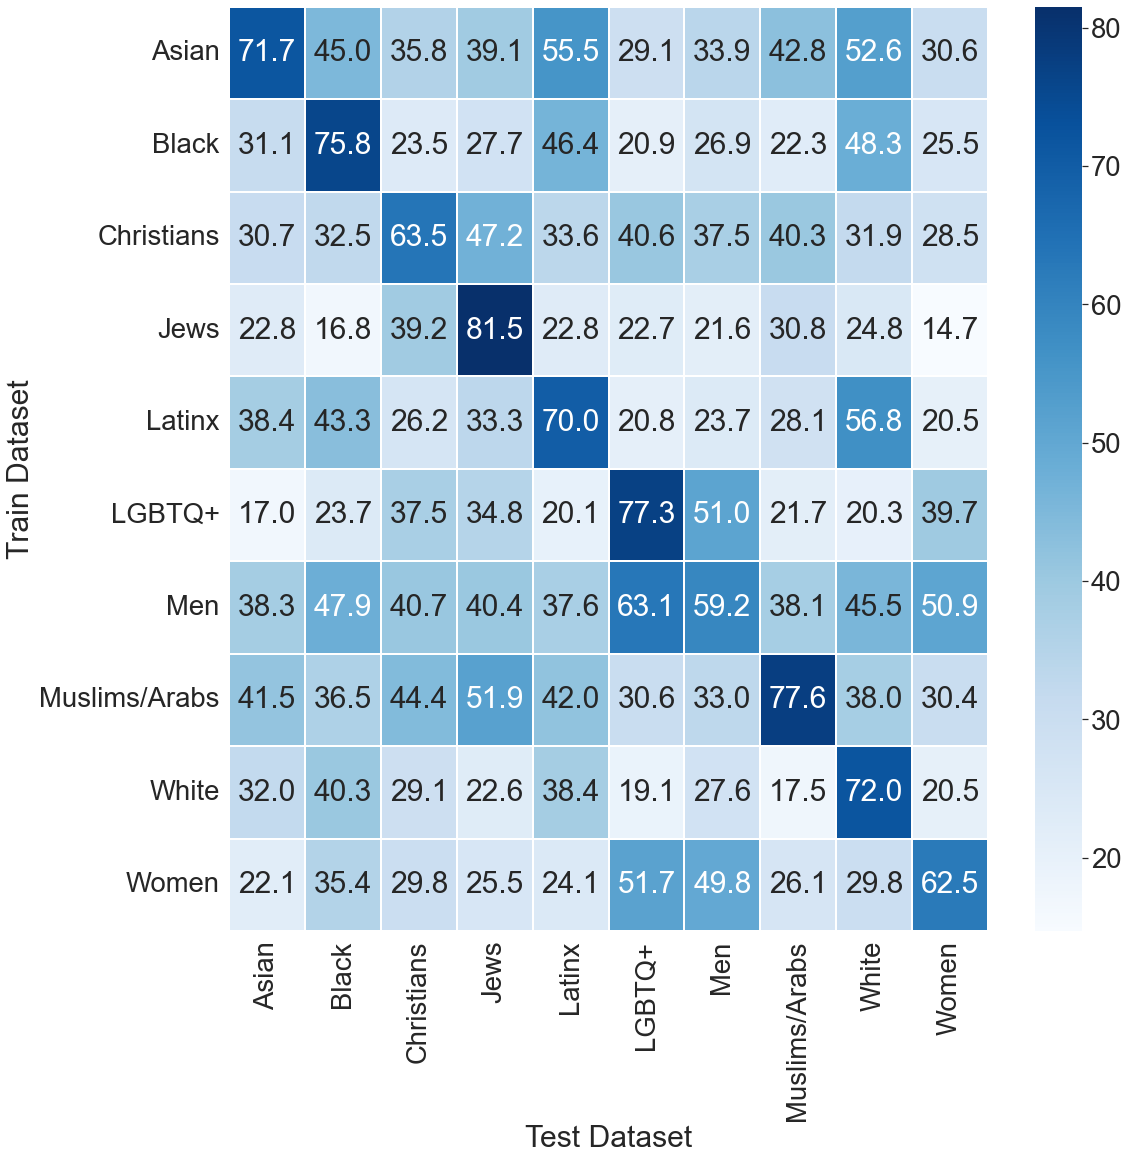

In [93]:
sns.set_theme(style='white', font_scale=2.5, palette="Set2")
plt.figure(figsize=(17,17))
p_4 = sns.heatmap(df_all, cmap='Blues', linewidths = 0.20, annot = True, fmt='.1f')
p_4.set_xticklabels(p_4.get_xticklabels())
p_4.set_yticklabels(p_4.get_yticklabels())
p_4.set_ylabel('Train Dataset')
p_4.set_xlabel('Test Dataset')
plt.savefig(r'C:\Users\lynne\Documents\Michael\hate speech\pythonplots\identityspecificcorpora.pdf', dpi=300, bbox_inches="tight")